# Implementation from Scratch

<br />

I am going to rewrite codes of 3 layers of neural network that I created on the previous sprint to expand them to any structures by using classes.

## [Task 1] Class Fully Connected Layer

## [Task 2] Class Initialization Method

## [Task 3] Class Optimization Method

## [Task 4] Class Activation Function

## [Task 5] Create a Class of ReLU

<br />

$$
% <![CDATA[
f(x) = ReLU(x) = \begin{cases}
x  & \text{if $x>0$,}\\
0 & \text{if $x\leqq0$.}
\end{cases} %]]>
$$

$x$ : a feature (scaler)

<br />

In addition, the following equation is a differentiation of $f(x)$ with respect to $x$ for backpropagation.

$$
% <![CDATA[
\frac{\partial f(x)}{\partial x} = \begin{cases}
1  & \text{if $x>0$,}\\
0 & \text{if $x\leqq0$.}
\end{cases} %]]>
$$

## [Task 6] Initial Value of Weight

<br />

Xavier's initial value

$$
\sigma = \frac{1}{\sqrt{n}}
$$

$n$ : Number of nodes of the previous layer

<br />

He's initial value

$$
\sigma = \sqrt{\frac{2}{n}}
$$

$n$ : Number of nodes of the previous layer

## [Task 7] Optimization Method

<br />

I am going to implement AdaGrad.

$$
H_i^{\prime}  = H_i+E(\frac{\partial L}{\partial W_i})×E(\frac{\partial L}{\partial W_i})\\
W_i^{\prime} = W_i - \alpha \frac{1}{\sqrt{H_i^{\prime} }} E(\frac{\partial L}{\partial W_i}) \\
$$

$H_i$ : Sum of squares of all gradients up to the previous iterations about ith layer

$H_i^{\prime}$ : Updated $H_i$

### Validation

<br />

I am going to validate classes that I created above by 3 layers of neural network with MNIST dataset.

In [1]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import copy
import sys

Using TensorFlow backend.


In [2]:
# Download the MNIST dataset

(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
# Flatten

X_train = X_train.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)

In [4]:
# Transform unit8 to float

X_train = X_train.astype(np.float)
X_test = X_test.astype(np.float)
X_train /= 255
X_test /= 255

In [5]:
# Transform correct labels that are 0 to 9 to 

# Initialize
enc = OneHotEncoder(handle_unknown='ignore', sparse=False)

# Fit
y_train_one_hot = enc.fit_transform(y_train[:, np.newaxis])

# Transform
y_test_one_hot = enc.transform(y_test[:, np.newaxis])

In [6]:
# Split the train dataset

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train_one_hot, test_size=0.2)

In [7]:
# Add a path searching for specific modules
sys.path.append("../scratch/model/")

# Import a class
from scratch_deep_neural_network import ScratchDeepNeuralNetrowkClassifier, FC, SimpleInitializer, AdaGrad, Dropout, Relu, Softmax

In [8]:
# Initialize
dnn = ScratchDeepNeuralNetrowkClassifier(100, 10)

# 1st layer
dnn.add(FC(784, 400, SimpleInitializer(sigma=0.01), AdaGrad(lr=0.001)))
dnn.add(Dropout())
dnn.add(Relu())

# 2nd layer
dnn.add(FC(400, 200, SimpleInitializer(sigma=0.01), AdaGrad(lr=0.001)))
dnn.add(Dropout())
dnn.add(Relu())

# 3rd layer
dnn.add(FC(200, 10, SimpleInitializer(sigma=0.01), AdaGrad(lr=0.001)))
dnn.add(Softmax())

In [9]:
# Fit

dnn.fit(X_train, y_train, X_val, y_val)

1ep loss: 1.8560136718101372, val_loss: 1.6876419316770275
2ep loss: 1.7477376489745986, val_loss: 1.5138187316658833
3ep loss: 1.6987452444117774, val_loss: 1.4441035359743883
4ep loss: 1.6685710272587773, val_loss: 1.4096045254448888
5ep loss: 1.6464778641857176, val_loss: 1.3885524892673307
6ep loss: 1.6275465244917533, val_loss: 1.3724343215820962
7ep loss: 1.610508885493059, val_loss: 1.3592875263353554
8ep loss: 1.5946209784357577, val_loss: 1.3479317578127115
9ep loss: 1.579383802272896, val_loss: 1.33772938759901
10ep loss: 1.564539097328446, val_loss: 1.3289591336558872
11ep loss: 1.5504512927903344, val_loss: 1.3209579314393152
12ep loss: 1.5368922812170285, val_loss: 1.3133634995482677
13ep loss: 1.5238406567083014, val_loss: 1.3062394320147797
14ep loss: 1.5112728833100026, val_loss: 1.299846988164909
15ep loss: 1.4993409632160355, val_loss: 1.2937763223027698
16ep loss: 1.487685796508339, val_loss: 1.28786326348967
17ep loss: 1.4768503335777508, val_loss: 1.282187187976601

In [10]:
# Predict

y_pred = dnn.predict(X_test)

In [11]:
y_pred

array([7, 2, 1, ..., 4, 8, 6])

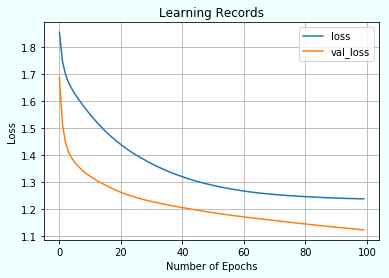

In [12]:
# Plot learning curves

dnn.plot_learning_record()

In [13]:
# Compute index values

dnn.compute_index_values(y_test, y_pred)

accuracy score: 0.8264


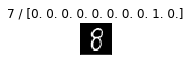

In [14]:
# Plot misclassifications

dnn.plot_misclassification(X_val, y_val, y_pred)